# Imports

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# Reading Data

In [2]:
data_path = r'../data/train.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# EDA

In [72]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

<AxesSubplot:ylabel='sales'>

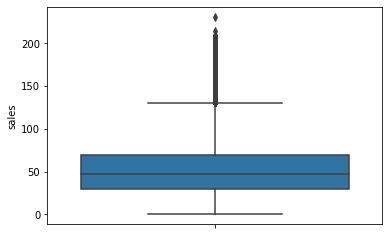

In [26]:
sns.boxplot(data=data,y='sales')

<AxesSubplot:xlabel='sales', ylabel='Count'>

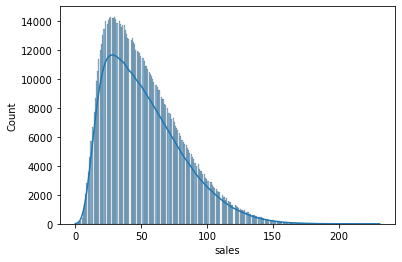

In [8]:

sns.histplot(data=data,x='sales',kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='sales', ylabel='Count'>

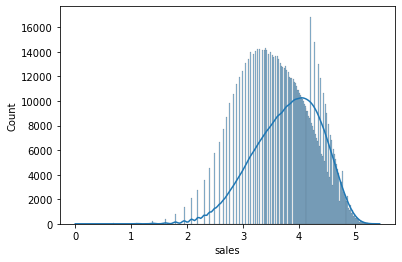

In [9]:
sns.histplot(data=np.log(data['sales']),kde=True)

In [14]:
perce = [np.percentile(data['sales'],x) for x in range(75,101)]

<AxesSubplot:>

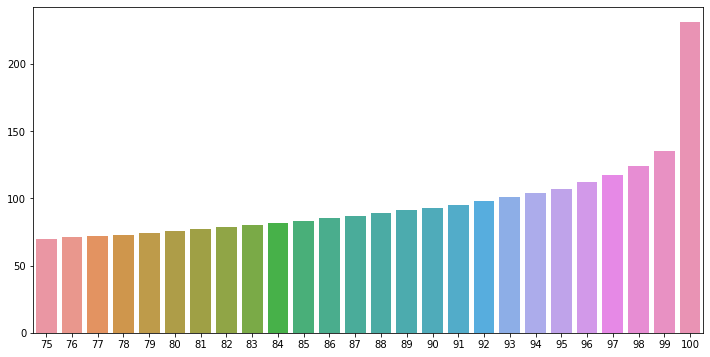

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(range(75,101)),y=perce)

<AxesSubplot:>

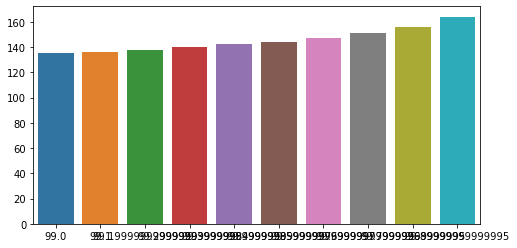

In [20]:
perce_99 = [np.percentile(data['sales'],x) for x in np.arange(99,100,0.1)]
plt.figure(figsize=(8,4))
sns.barplot(x=np.arange(99,100,0.1),y=perce_99)

In [23]:
data[data['sales']> np.percentile(data['sales'],99.99)]

,date,store,item,sales
222203,2016-06-11,2,13,187
222225,2016-07-03,2,13,189
222246,2016-07-24,2,13,204
222561,2017-06-04,2,13,190
222595,2017-07-08,2,13,191
...,...,...,...,...
806888,2017-06-11,2,45,194
806909,2017-07-02,2,45,205
806930,2017-07-23,2,45,205
817515,2016-07-17,8,45,191


## Date Column

In [74]:
data['sales']

0         13
1         11
2         14
3         13
4         10
          ..
912995    63
912996    59
912997    74
912998    62
912999    82
Name: sales, Length: 913000, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


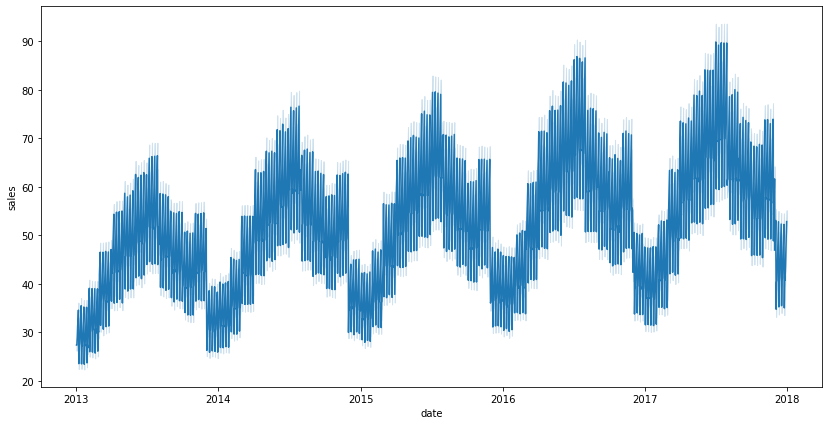

In [76]:
plt.figure(figsize=(14,7))
sns.lineplot(data['date'],y=data['sales'].astype('float'))
plt.show()

In [27]:
data.shape

(913000, 4)

In [30]:
data[data.duplicated(subset=['date','store','item'])]

,date,store,item,sales


In [31]:
data['date']

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
912995    2017-12-27
912996    2017-12-28
912997    2017-12-29
912998    2017-12-30
912999    2017-12-31
Name: date, Length: 913000, dtype: object

In [34]:
data['date'] = pd.to_datetime(data['date'])

In [60]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [41]:
data.groupby('year').agg({'sales':np.mean})

,sales
year,
2013,43.513660
2014,50.057436
2015,52.256915
2016,56.596503
2017,58.815014


In [43]:
data.groupby('year').agg({'sales':np.sum})

,sales
year,
2013,7941243
2014,9135482
2015,9536887
2016,10357160
2017,10733740


In [48]:
month_avg_sales = data.groupby('month').agg({'sales':np.mean}).reset_index()
month_avg_sales

,month,sales
0,1,35.524503
1,2,39.378397
2,3,47.305574
3,4,55.152893
4,5,59.128219
5,6,63.025480
6,7,66.998619
7,8,59.105226
8,9,55.072760
9,10,51.193806


In [50]:
### monthly avg sales

<AxesSubplot:xlabel='month', ylabel='sales'>

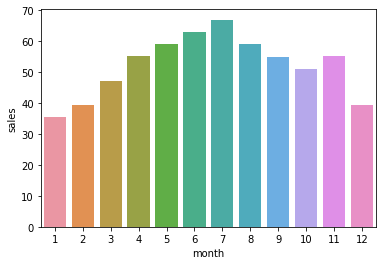

In [49]:
sns.barplot(data=month_avg_sales,x='month',y='sales')

In [64]:
above_99 = data[data['sales']> np.percentile(data['sales'],99.99)]

In [65]:
above_99['month'].value_counts()

7     62
6     16
8      5
11     1
5      1
Name: month, dtype: int64

In [66]:
above_99['year'].value_counts()

2017    54
2016    28
2015     2
2014     1
Name: year, dtype: int64

In [67]:
above_99['item'].value_counts()

15    28
28    25
18    12
13     8
45     5
25     3
22     2
36     1
38     1
Name: item, dtype: int64

In [68]:
above_99['store'].value_counts()

2     60
8     20
3      2
9      2
10     1
Name: store, dtype: int64

<AxesSubplot:xlabel='day', ylabel='sales'>

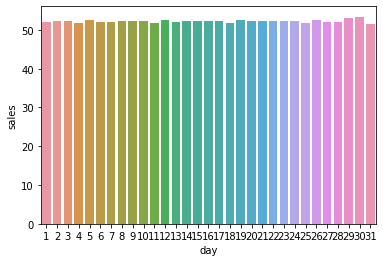

In [63]:
day_avg_sales = data.groupby('day').agg({'sales':np.mean}).reset_index()
sns.barplot(data=day_avg_sales,x='day',y='sales')

In [70]:
day_avg_sales

,day,sales
0,1,52.160433
1,2,52.290067
2,3,52.306900
3,4,51.823200
4,5,52.485333
5,6,52.130400
6,7,52.042933
7,8,52.277800
8,9,52.206800
9,10,52.312967


In [71]:
data

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27
912996,2017-12-28,10,50,59,2017,12,28
912997,2017-12-29,10,50,74,2017,12,29
912998,2017-12-30,10,50,62,2017,12,30


### Base model on the above data

In [79]:
lr = LinearRegression()
lr

LinearRegression()

In [81]:
lr.__class__.__name__ 

'LinearRegression'

In [91]:
data = data.sort_values(by=['date']).reset_index(drop=True)


In [95]:
train_data = data[data['year']<2017]

test_data = data[data['year']==2017]

In [84]:
def make_pipe(model):
    
    trans = ColumnTransformer(transformers=[('std',StandardScaler(),['store','item','year','month'])])
    
    pipe = Pipeline(steps=[('scaler',trans),
                           ('regressor',model)])
    
    return pipe

In [96]:
y_train = train_data['sales']
y_test = test_data['sales']

In [97]:
lr = LinearRegression()
rf = RandomForestRegressor()

lr_pipe = make_pipe(lr)
rf_pipe = make_pipe(rf)

In [98]:
lr_pipe.fit(train_data,y_train)
rf_pipe.fit(train_data,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['store', 'item', 'year',
                                                   'month'])])),
                ('regressor', RandomForestRegressor())])

In [100]:
lr_pred = lr_pipe.predict(test_data)
rf_pred = rf_pipe.predict(test_data)

In [101]:
mean_absolute_percentage_error(y_test,lr_pred)

0.6776016517403479

In [102]:
mean_absolute_percentage_error(y_test,rf_pred)

0.16408286296914396